In [3]:
import pandas as pd
import matplotlib.pyplot as plt

import re

In [4]:
file = '/home/rolvy-dicken/sentiment_analysis_on_coronavirus_tweets_dataset.csv'
# df = pd.read_csv(file)

In [5]:
import chardet
with open(file, 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'utf-8', 'confidence': 0.99, 'language': ''}

In [6]:
df = pd.read_csv(file, encoding = 'ISO-8859-1')

In [7]:
df;

# 1. Analysing the dataset 

In [8]:
df.sample(n=5, random_state=123)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
21746,25545,70497,"Bugolobi, Kampala-Uganda",25-03-2020,Four traders have been arrested in Koboko town...,Negative
27641,31440,76392,Chicago,03-04-2020,Definitely expecting the companies already lag...,Positive
16374,20173,65125,"Deerfield, IL",22-03-2020,The beginning of our week of confinement https...,Neutral
35458,39257,84209,Central Alberta,09-04-2020,Expert...? \r\r\n\r\r\nWeÂre] in a situation ...,Extremely Negative
38444,42243,87195,"California, USA",11-04-2020,ÂFew have any way to appreciate this newly fr...,Extremely Positive


In [9]:
# Check some values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [10]:
# Our dataset has 41157 rows and 6 columns
df.shape

(41157, 6)

In [11]:
# Columns in our dataset 
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [12]:
# Count location
df['Location'].value_counts()

London                540
United States         528
London, England       520
New York, NY          395
Washington, DC        373
                     ... 
New York, USA           1
Wrentham, MA            1
US OF A                 1
Elmira, ON, Canada      1
Midland, Texas          1
Name: Location, Length: 12220, dtype: int64

In [15]:
# Let's Check missing values in 'Location' column
miss_value = df['Location'].isnull().sum()/(df.shape[0]) * 100
print("we have {:.2f} % of missing values in 'Location' Column".format(miss_value))

we have 20.87 % of missing values in 'Location' Column


## Documents in the datset

In [16]:
print("There are '%s' documents in the dataset." %(df.shape[0]))

There are '41157' documents in the dataset.


## Documents per class

In [17]:
df['Sentiment'].value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

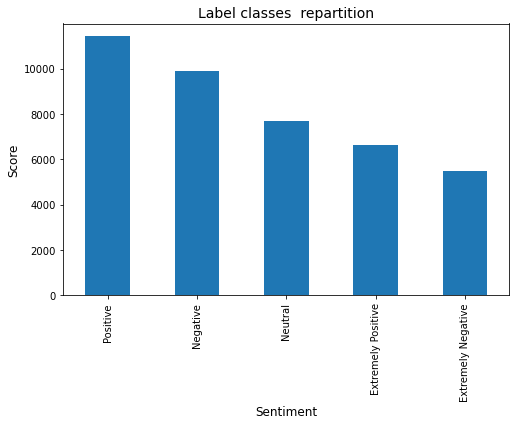

In [18]:
ax = df['Sentiment'].value_counts().plot(kind='bar', figsize=(8, 5))
fig = ax.get_figure()
ax.set_title('Label classes  repartition', size=14)
ax.set_xlabel('Sentiment', size=12)
ax.set_ylabel('Score', size=12)
plt.show()

# 2.  Textual data Preprocessing

In [19]:
covid = df.copy()
# covid['OriginalTweet'][234]

#### Remove @person caracter

In [11]:
def extract_mention(tweet):
    hashes = re.findall(r"@[\w]*", tweet)
    for i in hashes:
        tweet = re.sub(i, '', tweet)
    return tweet

In [12]:
covid['Clean_tweet'] = covid['OriginalTweet'].apply(extract_mention)
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,https://t.co/iFz9FAn2Pa and https://t.co/xX...
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [ ]:
# Remove 

In [13]:
covid['Clean_tweet'] = covid['Clean_tweet'].apply(lambda x: re.split('https:\/\/.*', str(x))[0])
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia: Woolworths to give elde...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,"Me, ready to go at supermarket during the #COV..."


In [ ]:
# remove punctions, words wich are not formed letters

In [14]:
covid['Clean_tweet'] = covid['Clean_tweet'].str.replace('[^a-zA-Z#]+',' ')

In [15]:
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...


In [16]:
# create new variable tokenized tweet 


In [17]:
def tokens_tweet(dataset):
    # we first remove short words
    dataset = ' '.join([x for x in dataset.split() if len(x) > 2])
    dataset_tokens = [t for t in dataset.split()]
    return dataset_tokens

In [18]:
covid['tokenized_tweet'] = covid['Clean_tweet'].apply(tokens_tweet) 
tokenized_tweet = covid['tokenized_tweet'] # Let's define the tokenized tweets 

### Stemming 

In [19]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

# apply stemmer for tokenized_tweet
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [20]:
# join tokens into one sentence
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])
# change df['Tweet'] to tokenized_tweet

In [21]:
tokenized_tweet = covid['Clean_tweet']
covid.head()
# covid['OriginalTweet'][234]
# covid['Clean_tweet'][234]

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet,tokenized_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,[]
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice Talk to your neighbours family to excha...,"[advice, Talk, your, neighbours, family, excha..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,Coronavirus Australia Woolworths to give elder...,"[Coronavirus, Australia, Woolworths, give, eld..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,My food stock is not the only one which is emp...,"[food, stock, not, the, only, one, which, empt..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,Me ready to go at supermarket during the #COVI...,"[ready, supermarket, during, the, #COVID, outb..."


### Let's Convert our text data to lowercase

In [22]:
covid['Clean_tweet'] = covid['Clean_tweet'].apply(lambda x: " ".join(x.lower() for x in x.split()))
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet,tokenized_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,[]
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk to your neighbours family to excha...,"[advice, Talk, your, neighbours, family, excha..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths to give elder...,"[Coronavirus, Australia, Woolworths, give, eld..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,my food stock is not the only one which is emp...,"[food, stock, not, the, only, one, which, empt..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,me ready to go at supermarket during the #covi...,"[ready, supermarket, during, the, #COVID, outb..."


### Let's now remove stop words

In [23]:
import nltk
nltk.download('stopwords') 

from nltk.corpus import stopwords
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /home/rolvy-
[nltk_data]     dicken/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
covid['Clean_tweet'] =covid['Clean_tweet'].apply(lambda x: ' '.join(x for x in x.split() if x not in stop))
covid.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,Clean_tweet,tokenized_tweet
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,,[]
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,advice talk neighbours family exchange phone n...,"[advice, Talk, your, neighbours, family, excha..."
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,coronavirus australia woolworths give elderly ...,"[Coronavirus, Australia, Woolworths, give, eld..."
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,food stock one empty please panic enough food ...,"[food, stock, not, the, only, one, which, empt..."
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative,ready go supermarket #covid outbreak paranoid ...,"[ready, supermarket, during, the, #COVID, outb..."


### features_needed

In [25]:
my_data = covid[['Clean_tweet', 'Sentiment']]
my_data.head(10)

,Clean_tweet,Sentiment
0,,Neutral
1,advice talk neighbours family exchange phone n...,Positive
2,coronavirus australia woolworths give elderly ...,Positive
3,food stock one empty please panic enough food ...,Positive
4,ready go supermarket #covid outbreak paranoid ...,Extremely Negative
5,news region first confirmed covid case came su...,Positive
6,cashier grocery store sharing insights #covid ...,Positive
7,supermarket today buy toilet paper #rebel #toi...,Neutral
8,due covid retail store classroom atlanta open ...,Positive
9,corona prevention stop buy things cash use onl...,Negative
